In [21]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
from __future__ import division

In [11]:
citibike_data = '201506-citibike-tripdata.csv'
citibike = pd.read_csv(citibike_data)

In [12]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [13]:
df = citibike[['tripduration', 'starttime', 'usertype']]
df = df.dropna()

In [14]:
df1 = df[df.usertype == 'Subscriber']
df2 = df[df.usertype == 'Customer']

In [24]:
print len(df1), len(df2)

810838 130381


In [26]:
len(df1)/len(df2)

6.218988963115791

In [15]:
#df['Dura_Subs'] = df['tripduration'][df['usertype']=='Subscriber']
#df['Dura_Cust'] = df['tripduration'][df['usertype']=='Customer']

In [16]:
df1['datetime'] = pd.to_datetime(df.starttime).dt.hour
df1trip = df1['tripduration'].groupby([df1.datetime]).mean()
df1count = df1['tripduration'].groupby([df1.datetime]).count()

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df2['datetime'] = pd.to_datetime(df.starttime).dt.hour
df2trip = df2['tripduration'].groupby([df2.datetime]).mean()
df2count = df2['tripduration'].groupby([df2.datetime]).count()

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
dfcount = df1count + df2count

In [19]:
#df1trip[0]
#col = ((df1trip.index)+10)/34
#color = pd.DataFrame(data=color)
#col.astype(float)
#c = np.array(col)


In [66]:
print dfcount

datetime
0      9370
1      5082
2      2920
3      1818
4      1593
5      5344
6     21360
7     43398
8     75807
9     60499
10    38933
11    41112
12    47168
13    50950
14    52533
15    54781
16    65320
17    92894
18    90113
19    64700
20    45840
21    30722
22    23039
23    15923
dtype: int64


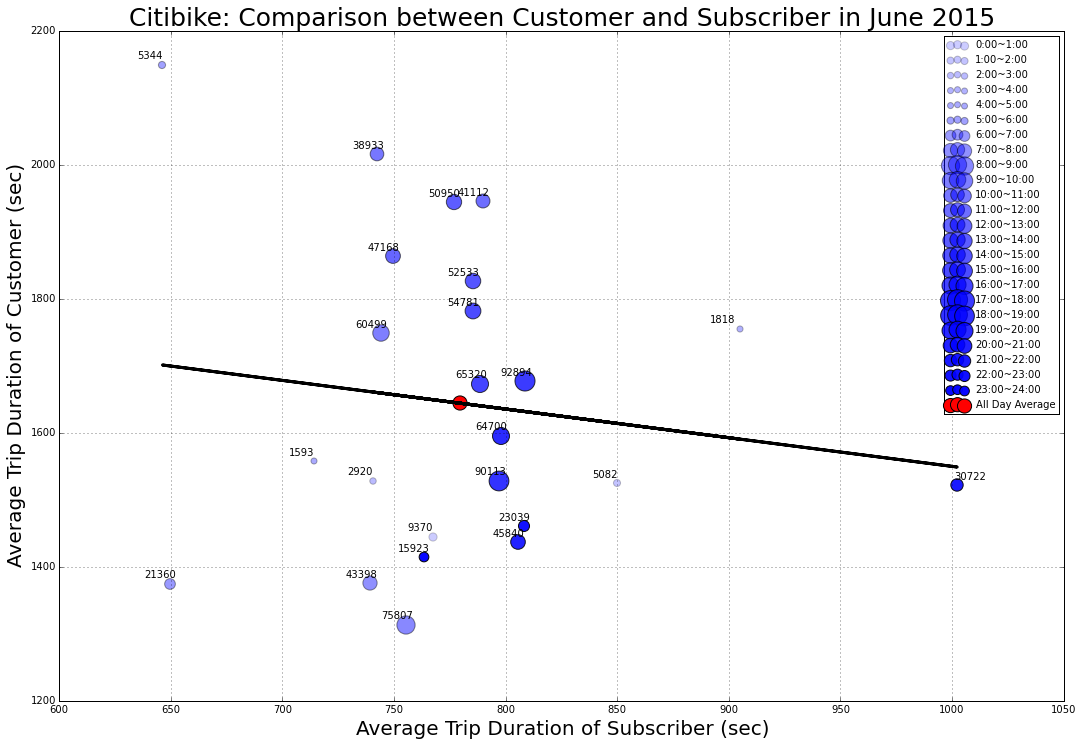

In [87]:
fig=plt.figure(figsize=(18, 12))

ax=fig.add_subplot(111)
for i in range(0,24):
    size = dfcount[i]/150+50
    #plt.scatter(df1trip[i], df2trip[i], s=size, label='{0}:00 total count  {1}'.format(i,dfcount[i]),c=c,alpha=0.7,cmap = 'cool')
    ax.scatter(df1trip[i], df2trip[i], s=size*0.6, marker='o',label='{0}:00~{1}:00'.format(i,i+1),c='blue',alpha=(i+6)/30)#,cmap = 'Blues_r')

#pl.legend(fontsize=15,loc='best')   

ax.scatter(df1trip.mean(),df2trip.mean(),s=200,c='red',label='All Day Average')

ax.set_xlabel('Average Trip Duration of Subscriber (sec)',fontsize=20)
ax.set_ylabel('Average Trip Duration of Customer (sec)',fontsize=20)

import statsmodels.formula.api as smf
model = smf.ols(formula = 'y ~ x', data={'x': df1trip, 'y': df2trip}).fit()
#model.summary()

ax.plot(df1trip, model.predict(), '-', c='black', lw=3)

df1tripnew = df1trip
df1tripnew[3] -= 2
df1tripnew[21] += 10
df2tripnew = df2trip


for i, txt in enumerate(dfcount):
    ax.annotate(txt, (df1tripnew[i]-11,df2tripnew[i]+8))

plt.legend(loc='upper right', fontsize=10) 

plt.grid(True)
plt.title('Citibike: Comparison between Customer and Subscriber in June 2015',fontsize=25)
plt.show()